## FEC 2018 Campaign Finance: 

### Contributions from committees to candidates & independent expenditures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from copy import deepcopy
# from datetime import datetime as dt
from matplotlib import font_manager as fm, rcParams
from matplotlib.lines import Line2D
from matplotlib.offsetbox import (
    AnnotationBbox,
    OffsetImage, 
)

from scatterparty import *
from getscatters import *

%matplotlib inline

In [2]:
gave = pd.read_csv('data/04/committee_stats_2.csv')
gave.head(2)

,name,H0AL02087,H0AL05163,H0AL07086,H0AR01083,H0AR03055,H0AZ01259,H0CA03078,H0CA10073,H0CA10149,...,distinct,cmte_ids,entity_tps,cmte_id_ct,r_amt,r_count,d_amt,d_count,r_amt:total,r_count:total
0,WATERFRONT STRATEGIES,0,0,0,0,0,0,0,0,0,...,66,"['C90012956', 'C00484642', 'C90015025', 'C0048...",['enttp_Organization (not a committee and not ...,20,60168075.0,39,24957441.0,27,0.706816,0.590909
1,NEBO MEDIA,0,0,0,0,0,0,0,0,0,...,38,"['C00677120', 'C00504530']",['enttp_Organization (not a committee and not ...,2,3729113.0,6,53915755.0,32,0.064691,0.157895


In [3]:
cand = pd.read_csv('data/04/df_cleaned_04b.csv')
cand.head(2)

,cand_id,cand_name,cand_ici,cand_pty_affiliation,ttl_receipts,trans_from_auth,ttl_disb,trans_to_auth,coh_bop,coh_cop,...,JAMESTOWN ASSOCIATES,THE PIVOT GROUP,IN FIELD STRATEGIES,REVOLUTION MEDIA GROUP,RODNEY FOR CONGRESS,CANAL PARTNERS MEDIA,UPTON FOR ALL OF US,IMGE,BLAINE FOR CONGRESS,SKDKNICKERBOCKER
0,H0AL02087,"ROBY, MARTHA",I,Republican,2573681.12,85734.19,2277448.83,0.0,45450.72,341683.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,727.0,0.0,851.0
1,H0AL05163,"BROOKS, MO",I,Republican,1527246.16,0.00,2006001.97,0.0,1170937.70,692181.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,851.0


### SKDKNICKERBOCKER

In [4]:
comm = 'SKDKNICKERBOCKER'

In [5]:
cand.loc[cand['cand_pty_affiliation'] == 'Republican', comm].value_counts().sort_index()

0.0         196
851.0       186
17801.0       1
43134.0       1
50850.0       1
51701.0       1
67800.0       1
134546.0      1
191360.0      1
248351.0      1
346307.0      1
Name: SKDKNICKERBOCKER, dtype: int64

In [6]:
cand.loc[
    (cand['cand_pty_affiliation'] == 'Republican') & \
    (cand[comm] > 851), 
    [
        'cand_name', 
        'contest',
        'cand_ici',
        'cand_pty_affiliation', 
        comm, 
        'winner_flag', 
    ]
].sort_values([comm], ascending = False)

,cand_name,contest,cand_ici,cand_pty_affiliation,SKDKNICKERBOCKER,winner_flag
326,"LEWIS, JASON MARK MR.",MN_02,I,Republican,346307.0,0
231,"TENNEY, CLAUDIA",NY_22,I,Republican,248351.0,0
452,"COFFMAN, MIKE REP.",CO_06,I,Republican,191360.0,0
431,"ROHRABACHER, DANA",CA_48,I,Republican,134546.0,0
664,"HARDY, CRESENT",NV_04,O,Republican,67800.0,0
185,"KNIGHT, STEVE",CA_25,I,Republican,51701.0,0
438,"HARKEY, DIANE",CA_49,O,Republican,50850.0,0
946,"MORRISEY, PATRICK MR",WV_senate,C,Republican,43134.0,0
29,"YODER, KEVIN",KS_03,I,Republican,17801.0,0


In [7]:
cand.loc[cand['cand_pty_affiliation'] == 'Democrat', comm].value_counts().sort_index()

0.0        464
851.0        5
33900.0      1
65000.0      1
67800.0      1
71932.0      1
Name: SKDKNICKERBOCKER, dtype: int64

In [8]:
cand.loc[
    (cand['cand_pty_affiliation'] == 'Democrat') & \
    (cand[comm] > 0), 
    [
        'cand_name', 
        'contest',
        'cand_ici',
        'cand_pty_affiliation', 
        comm, 
        'winner_flag', 
    ]
].sort_values([comm], ascending = False)

,cand_name,contest,cand_ici,cand_pty_affiliation,SKDKNICKERBOCKER,winner_flag
865,"MANCHIN III, JOE",WV_senate,I,Democrat,71932.0,1
596,"PHILLIPS, DEAN",MN_03,C,Democrat,67800.0,1
459,"HAYES, JAHANA",CT_05,O,Democrat,65000.0,1
453,"CROW, JASON",CO_06,C,Democrat,33900.0,1
94,"BISHOP, SANFORD D",GA_02,I,Democrat,851.0,1
117,"PETERSON, COLLIN CLARK",MN_07,I,Democrat,851.0,1
157,"CUELLAR, HENRY R.",TX_28,I,Democrat,851.0,1
372,"KIND, RONALD JAMES",WI_03,I,Democrat,851.0,1
721,"SCHRADER, KURT",OR_05,I,Democrat,851.0,1


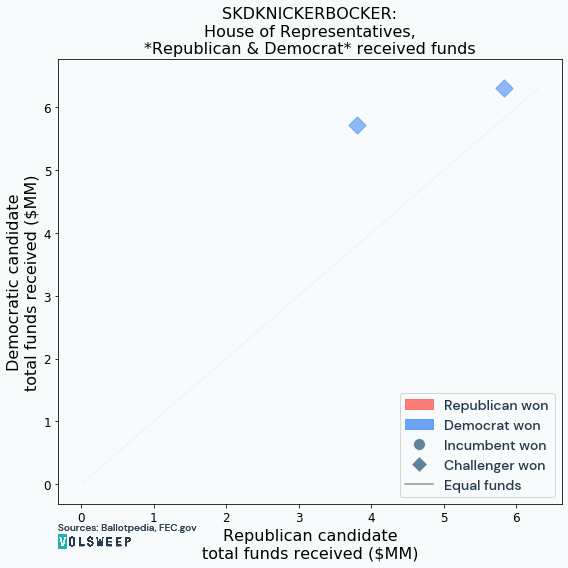

In [9]:
scatterparty(
    getscatters(cand, comm), 
    title=f'{comm}:\nHouse of Representatives,\n*Republican & Democrat* received funds', 
    
)

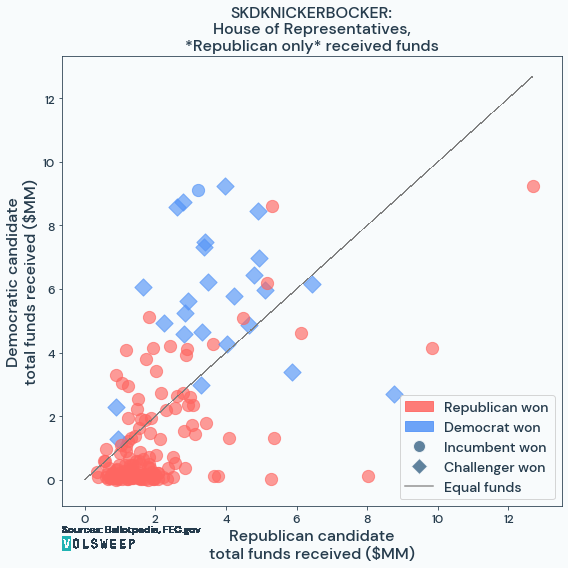

In [10]:
scatterparty(
    getscatters(cand, comm, party = 'rep'), 
    title=f'{comm}:\nHouse of Representatives,\n*Republican only* received funds', 
)

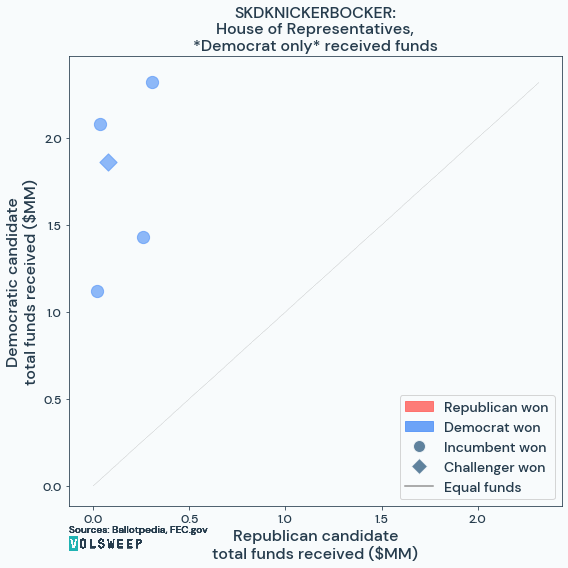

In [11]:
scatterparty(
    getscatters(cand, comm, party = 'dem'), 
    title=f'{comm}:\nHouse of Representatives,\n*Democrat only* received funds', 
)

### WATERFRONT STRATEGIES

In [12]:
comm = 'WATERFRONT STRATEGIES'

In [13]:
cand.loc[cand['cand_pty_affiliation'] == 'Republican', comm].value_counts().sort_index()

0.0           352
5119.0          3
66576.0         1
72529.0         1
77822.0         1
85559.0         1
96390.0         1
104470.0        1
170187.0        1
185424.0        1
191856.0        1
202970.0        1
214241.0        1
225023.0        1
231736.0        1
254564.0        1
270323.0        1
419395.0        1
430976.0        1
510695.0        1
534750.0        1
567295.0        1
598587.0        1
602641.0        1
748973.0        1
778994.0        1
922300.0        1
1162958.0       1
1741405.0       1
2281405.0       1
2447081.0       1
2937197.0       1
3201343.0       1
3992139.0       1
4119385.0       1
8881205.0       1
9253493.0       1
11570831.0      1
Name: WATERFRONT STRATEGIES, dtype: int64

In [14]:
cand.loc[
    (cand['cand_pty_affiliation'] == 'Republican') & \
    (cand[comm] > 0), 
    [
        'cand_name', 
        'contest',
        'cand_ici',
        'cand_pty_affiliation', 
        comm, 
        'winner_flag', 
    ]
].sort_values([comm], ascending = False)

,cand_name,contest,cand_ici,cand_pty_affiliation,WATERFRONT STRATEGIES,winner_flag
912,"HAWLEY, JOSHUA DAVID",MO_senate,C,Republican,11570831.0,1
898,"BRAUN, MIKE",IN_senate,C,Republican,9253493.0,1
874,"HELLER, DEAN",NV_senate,I,Republican,8881205.0,0
890,"MCSALLY, MARTHA",AZ_senate,O,Republican,4119385.0,0
946,"MORRISEY, PATRICK MR",WV_senate,C,Republican,3992139.0,0
917,"ROSENDALE, MATT",MT_senate,C,Republican,3201343.0,0
933,"BLACKBURN, MARSHA MRS.",TN_senate,O,Republican,2937197.0,1
896,"SCOTT, RICK GOV",FL_senate,C,Republican,2447081.0,1
918,"CRAMER, KEVIN MR.",ND_senate,C,Republican,2281405.0,1
226,"MACARTHUR, THOMAS",NJ_03,I,Republican,1741405.0,0


In [15]:
cand.loc[cand['cand_pty_affiliation'] == 'Democrat', comm].value_counts().sort_index()

0.0          446
1000.0         1
22389.0        1
23706.0        1
75000.0        1
77822.0        1
80000.0        1
81072.0        1
125303.0       1
137309.0       1
173365.0       1
198363.0       1
230000.0       1
262046.0       1
491171.0       1
622585.0       1
656058.0       1
660000.0       1
742428.0       1
784905.0       1
808560.0       1
839015.0       1
1223119.0      1
1499350.0      1
1539568.0      1
2093462.0      1
4383453.0      1
7126392.0      1
Name: WATERFRONT STRATEGIES, dtype: int64

In [16]:
cand.loc[
    (cand['cand_pty_affiliation'] == 'Democrat') & \
    (cand[comm] > 0), 
    [
        'cand_name', 
        'contest',
        'cand_ici',
        'cand_pty_affiliation', 
        comm, 
        'winner_flag', 
    ]
].sort_values([comm], ascending = False)

,cand_name,contest,cand_ici,cand_pty_affiliation,WATERFRONT STRATEGIES,winner_flag
895,"NELSON, BILL",FL_senate,I,Democrat,7126392.0,0
865,"MANCHIN III, JOE",WV_senate,I,Democrat,4383453.0,1
868,"DONNELLY, JOSEPH S",IN_senate,I,Democrat,2093462.0,0
934,"BREDESEN, PHILIP",TN_senate,O,Democrat,1539568.0,0
878,"BALDWIN, TAMMY",WI_senate,I,Democrat,1499350.0,1
882,"MCCASKILL, CLAIRE",MO_senate,I,Democrat,1223119.0,0
871,"HEITKAMP, HEIDI",ND_senate,I,Democrat,839015.0,0
594,"FEEHAN, DANIEL",MN_01,O,Democrat,808560.0,0
541,"DAVIDS, SHARICE",KS_03,C,Democrat,784905.0,1
883,"TESTER, JON",MT_senate,I,Democrat,742428.0,1


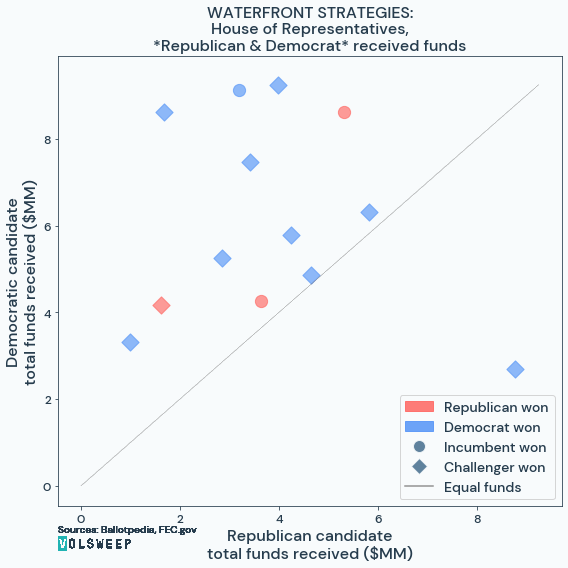

In [17]:
scatterparty(
    getscatters(cand, comm), 
    title=f'{comm}:\nHouse of Representatives,\n*Republican & Democrat* received funds', 
)

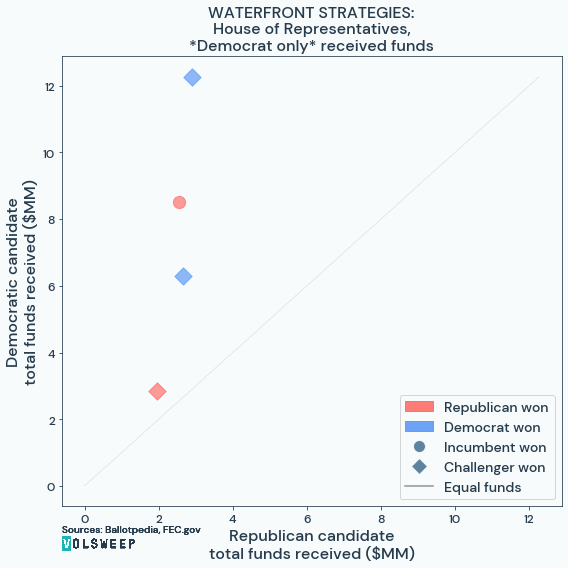

In [18]:
scatterparty(
    getscatters(cand, comm, party = 'dem'), 
    title=f'{comm}:\nHouse of Representatives,\n*Democrat only* received funds', 
)

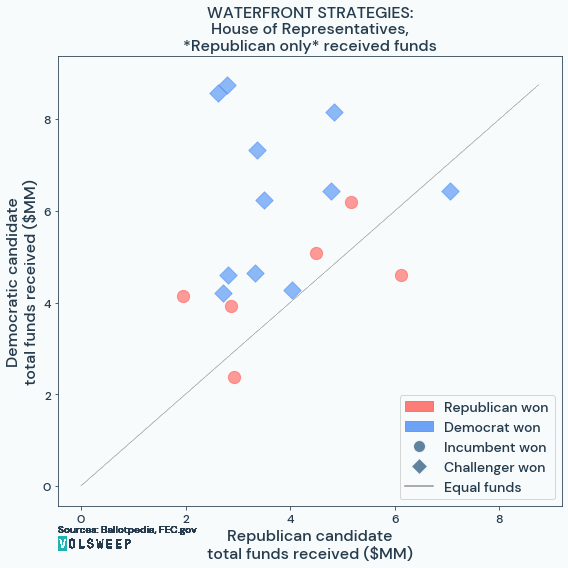

In [19]:
scatterparty(
    getscatters(cand, comm, party = 'rep'), 
    title=f'{comm}:\nHouse of Representatives,\n*Republican only* received funds', 
)

### NEBO MEDIA

In [20]:
comm = 'NEBO MEDIA'

In [21]:
cand.loc[cand['cand_pty_affiliation'] == 'Democrat', comm].value_counts().sort_index()

0.0          441
53895.0        1
335572.0       1
487491.0       1
493737.0       1
608963.0       1
630109.0       1
868313.0       1
884698.0       1
1111026.0      1
1150363.0      1
1239165.0      1
1293960.0      1
1530943.0      1
1583439.0      1
1586302.0      1
1694251.0      1
1711344.0      1
1893587.0      1
1956263.0      1
1998371.0      1
2027199.0      1
2033029.0      1
2222302.0      1
2311093.0      1
2313216.0      1
2463596.0      1
2506418.0      1
2560968.0      1
2583426.0      1
2630576.0      1
3083022.0      1
4069118.0      1
Name: NEBO MEDIA, dtype: int64

In [22]:
cand.loc[
    (cand['cand_pty_affiliation'] == 'Democrat') & \
    (cand[comm] > 0), 
    [
        'cand_name', 
        'contest',
        'cand_ici',
        'cand_pty_affiliation', 
        comm, 
        'winner_flag', 
    ]
].sort_values([comm], ascending = False)

,cand_name,contest,cand_ici,cand_pty_affiliation,NEBO MEDIA,winner_flag
417,"HILL, KATHERINE LAUREN",CA_25,C,Democrat,4069118.0,1
601,"RADINOVICH, JOSEPH",MN_08,O,Democrat,3083022.0,0
434,"PORTER, KATHERINE",CA_45,C,Democrat,2630576.0,1
643,"KIM, ANDY",NJ_03,C,Democrat,2583426.0,1
427,"CISNEROS, GILBERT",CA_39,O,Democrat,2560968.0,1
405,"HARDER, JOSH",CA_10,C,Democrat,2506418.0,1
686,"BRINDISI, ANTHONY",NY_22,C,Democrat,2463596.0,1
436,"ROUDA, HARLEY E JR",CA_48,C,Democrat,2313216.0,1
453,"CROW, JASON",CO_06,C,Democrat,2311093.0,1
695,"PUREVAL, AFTAB",OH_01,C,Democrat,2222302.0,0


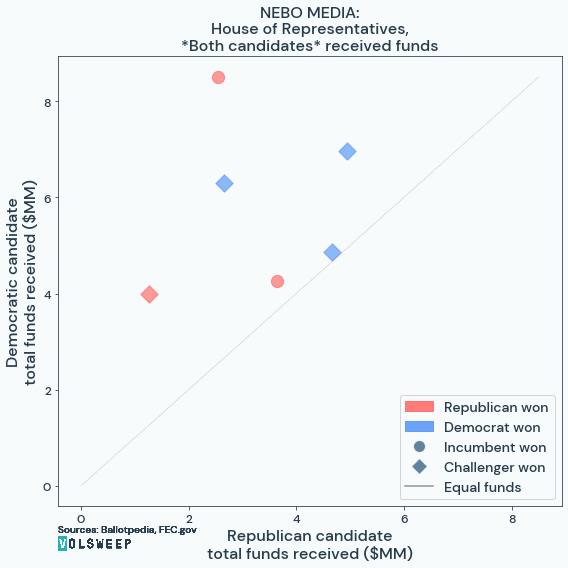

In [23]:
scatterparty(
    getscatters(cand, comm), 
    title=f'{comm}:\nHouse of Representatives,\n*Both candidates* received funds', 
)

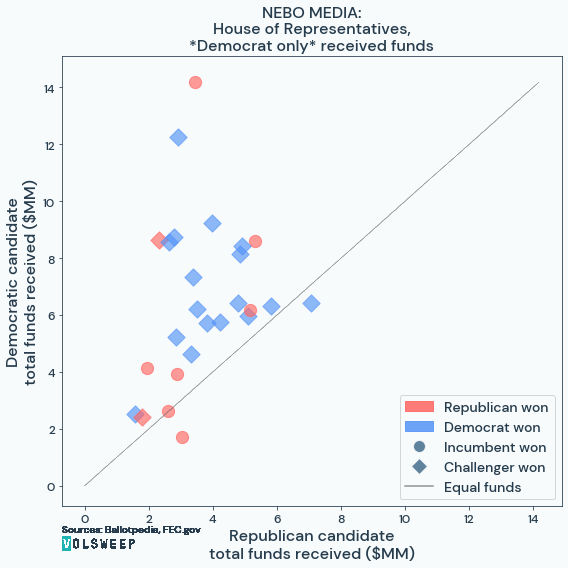

In [24]:
scatterparty(
    getscatters(cand, comm, party = 'dem'), 
    title=f'{comm}:\nHouse of Representatives,\n*Democrat only* received funds', 
)